## Step1: Importing image and Libararies

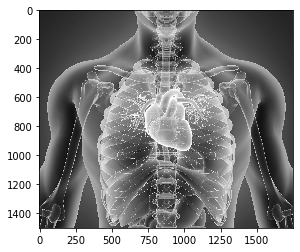

In [1]:
import numpy as np
from scipy import ndimage
import cv2
from matplotlib import pyplot as plt
from skimage import data
# img=data.chelsea()
# img=img.astype('float64')
img1=cv2.imread("heartt.jpeg")
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1,cmap="gray")
# type(img)

## Step2: Designing all filters to be used

In [2]:
laplacian=np.array([[1,0,0,1,0,0,1],
                          [0,2,0,2,0,2,0],
                          [0,0,4,4,4,0,0],
                          [1,2,4,-56,4,2,1],
                          [0,0,4,4,4,0,0],
                          [0,2,0,2,0,2,0],
                          [1,0,0,1,0,0,1]])
kernel_ver= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_diag=  np.array([[0,-1,-2],[1,0,-1],[2,1,0]])
kernel_horizontal=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# sobel1= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
def mean_filter(image,dim):
    kernel=np.ones((dim,dim),dtype=np.float32)/(dim**2)
    im_new=cv2.filter2D(image,-1,kernel)
    return im_new



## Step3: Cascading filter operations over our image


In [3]:
# Laplacian of our image
img_lap= cv2.filter2D(img1,-1,laplacian)
## sharpening: Addition or original image to laplacianed image
img_sharp= img1+img_lap
img_sharp=((img_sharp-img_sharp.min())/(img_sharp.max()-img_sharp.min()))*255
img_sharp=img_sharp.astype(np.int)

## Sobel operator of origninal image
img_sobel=cv2.filter2D(img1,-1,sobel)

## Smoothing sobeled image by average filter
img_mean= mean_filter(img_sobel,5)

## Multiplyinng sharpened laplacian and smoothed sobel
img_mul= (img_sharp/255)*(img_mean/255)
img_mul=((img_mul-img_mul.min())/(img_mul.max()-img_mul.min()))*255
img_mul=img_mul.astype(np.int)

## Sharpening resulting image by adding original image

img_final1= img1+img_mul
img_final1=((img_final1-img_final1.min())/(img_final1.max()-img_final1.min()))*255
img_final1=img_final1.astype(np.int)

# plt.imshow(img_final1,cmap="gray")


## Final Step: Power law transformation

(<matplotlib.axes._subplots.AxesSubplot at 0x183b6de2b08>,
 Text(0.5, 1.0, 'Final image by power law'))

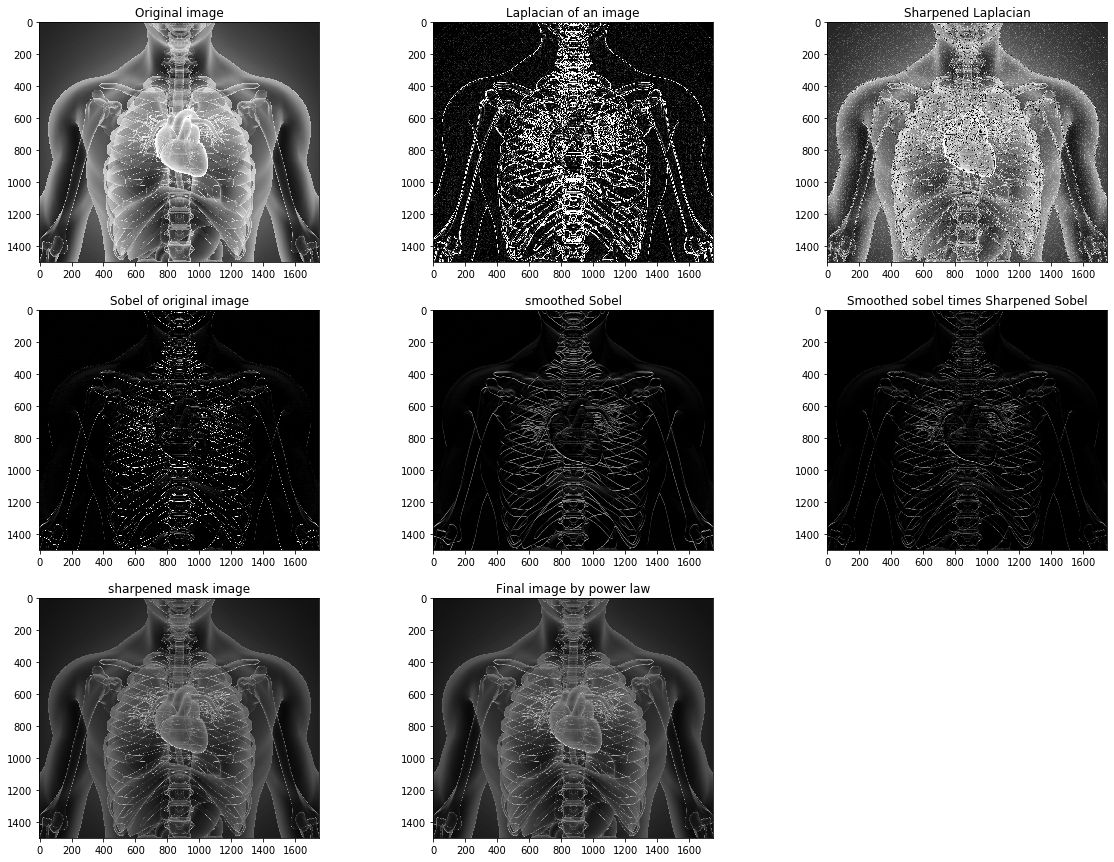

In [4]:
img_final=255*(img_final1)^8
fig= plt.figure(figsize=(20,15))
fig.add_subplot(331),plt.imshow(img1,cmap='gray'),plt.title("Original image")
fig.add_subplot(332),plt.imshow(img_lap,cmap='gray'),plt.title("Laplacian of an image")
fig.add_subplot(333),plt.imshow(img_sharp,cmap='gray'),plt.title("Sharpened Laplacian")
fig.add_subplot(334),plt.imshow(img_sobel,cmap='gray'),plt.title("Sobel of original image")
fig.add_subplot(335),plt.imshow(img_mean,cmap='gray'),plt.title("smoothed Sobel")
fig.add_subplot(336),plt.imshow(img_mul,cmap='gray'),plt.title("Smoothed sobel times Sharpened Sobel")
fig.add_subplot(337),plt.imshow(img_final1,cmap='gray'),plt.title("sharpened mask image")
fig.add_subplot(338),plt.imshow(img_final,cmap='gray'),plt.title("Final image by power law")